In [1]:
from CircleParticleSim import *
import numpy as np
import numpy.random as rand


initial energy 357.63795411284354


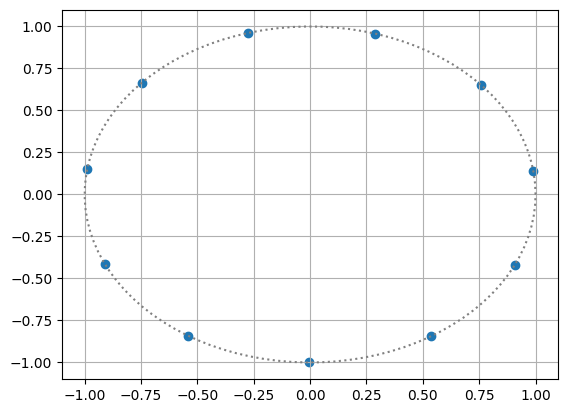

mimimal energy 97.15400245828094
mimimal energy 97.15400245828093
initial energy 208.73403465234784


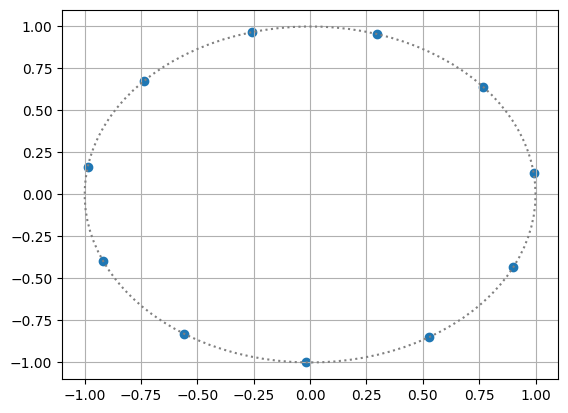

mimimal energy 97.15543508409831
mimimal energy 97.1554350840983
initial energy 182.72787699058995


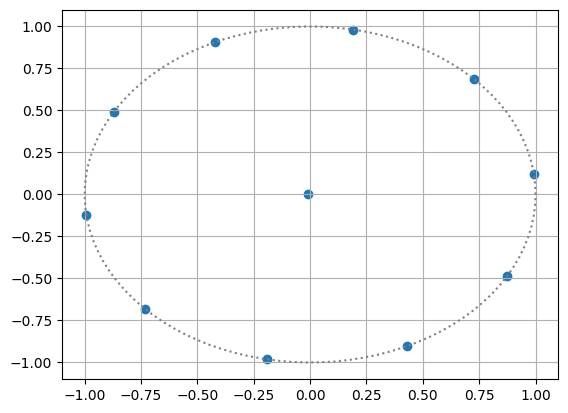

mimimal energy 97.25254296895464
mimimal energy 97.2525429689548
initial energy 229.2272444459922


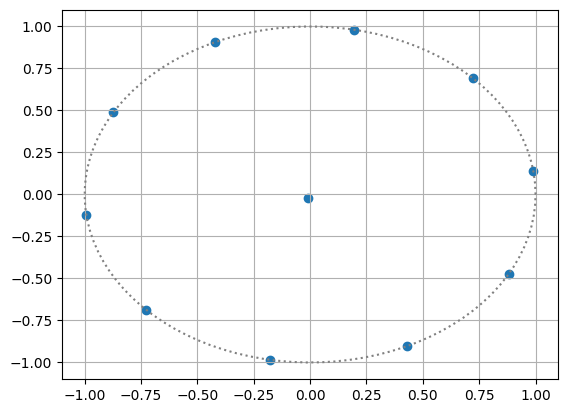

mimimal energy 97.25625173239973
mimimal energy 97.25625173240005
initial energy 242.97453705038652


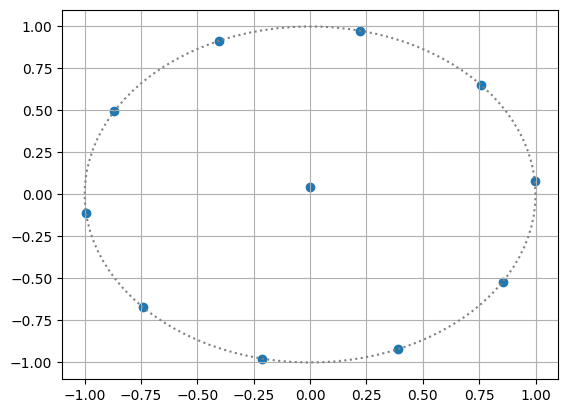

mimimal energy 97.25977691062295
mimimal energy 97.25977691062306
initial energy 216.61836614970292


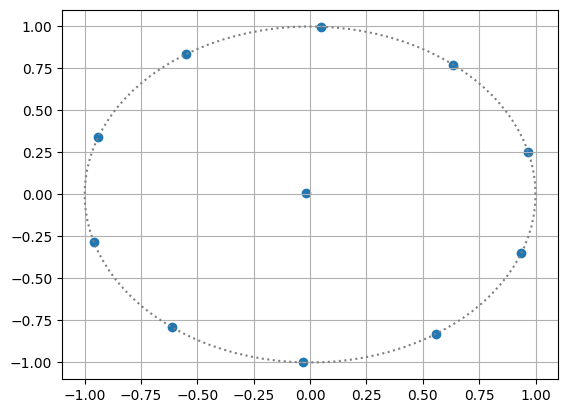

mimimal energy 97.25637384817122
mimimal energy 97.25637384817128
initial energy 349.7490858064825


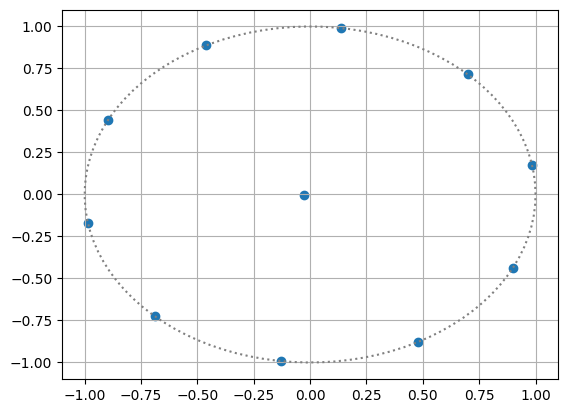

mimimal energy 97.25596574652658
mimimal energy 97.25596574652664
initial energy 240.5023697302312


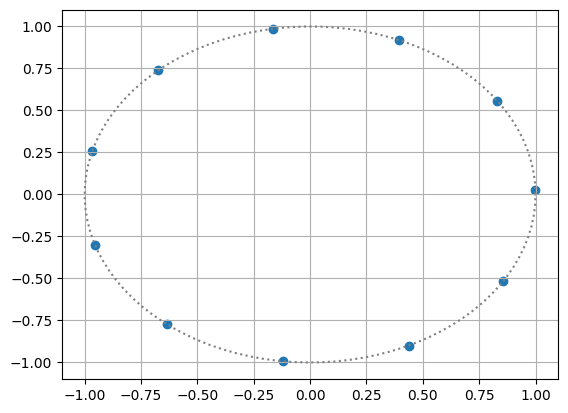

mimimal energy 97.15264638783812
mimimal energy 97.15264638783785
initial energy 285.66695838364774


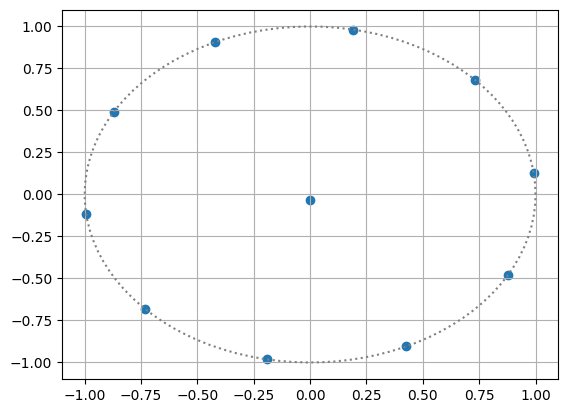

mimimal energy 97.25348009518541
mimimal energy 97.25348009518476
initial energy 257.3674223444028


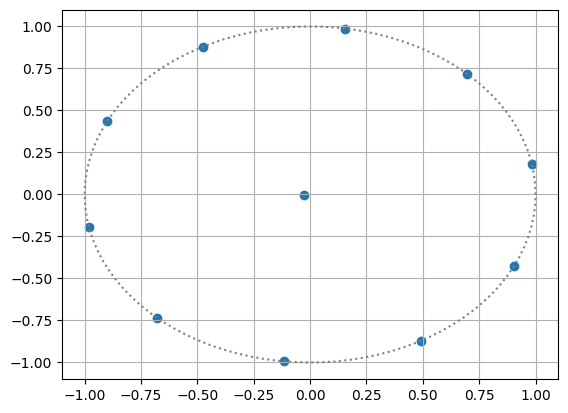

mimimal energy 97.26333159940418
mimimal energy 97.2633315994039


In [2]:
rand.seed(42)
for i in range(10):
    CircleParticleSim(11, steps=10000, seed=rand.randint(0,2**31-1),
                 cooling_schedule = paper_cooling_schedule,
                 step_size_schedule = random_step_size_schedule
                 )

The average particles inside the circle:

In [ ]:
def run_experiment(max_particles, steps, num_runs=10):
    """
    Run the simulation for a range of particle numbers and record averaged results.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results: A list of dictionaries containing particle count, averaged internal particle count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    results = []
    examples = []

    for num_particles in range(2, max_particles + 1):
        internal_counts = []
        energies = []
        example_locations = None

        for run in range(num_runs):
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=paper_cooling_schedule,
                step_size_schedule=random_step_size_schedule,
                steps=steps
            )
            sim.run_simulation(steps)

            internal_counts.append(np.sum(np.linalg.norm(sim.particle_locations, axis=1) < 0.99))
            energies.append(sim.E)

            if run == 0:  # Save the first run as an example
                example_locations = sim.particle_locations

        avg_internal_count = np.mean(internal_counts)
        avg_energy = np.mean(energies)

        results.append({
            "Particles": num_particles,
            "Internal Count (Avg)": avg_internal_count,
            "Total Energy (Avg)": avg_energy
        })

        examples.append((num_particles, example_locations))
        print(f"Completed simulation for {num_particles} particles (averaged over {num_runs} runs).")

    return results, examples

def plot_results_and_examples(results, examples):
    """
    Plot the results table and one example configuration for each particle count in a combined figure.

    Parameters:
    - results: List of dictionaries containing particle count, averaged internal particle count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    import pandas as pd
    from IPython.display import display

    # Convert results to a DataFrame and display it
    results_df = pd.DataFrame(results)
    display(results_df)

    # Plot particle configurations
    num_examples = len(examples)
    fig, axes = plt.subplots(nrows=(num_examples // 4) + 1, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (num_particles, locations) in enumerate(examples):
        ax = axes[idx]
        thetas = np.linspace(0, 2 * np.pi, 100)
        ax.plot(np.cos(thetas), np.sin(thetas), linestyle=':', color='gray')
        ax.scatter(locations[:, 0], locations[:, 1])
        ax.set_title(f"{num_particles} Particles")
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.axis('off')

    # Turn off unused subplots
    for ax in axes[len(examples):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_particles = 5
    max_particles = 20
    steps = 10000
    num_runs = 25

    # Run the experiment and collect results
    results, examples = run_experiment(max_particles, steps, num_runs)

    # Plot results table and example configurations
    plot_results_and_examples(results, examples)

initial energy 18.937434020677447
initial energy 2.178625898268526
initial energy 8.551440086857399
initial energy 6.838039792589132
initial energy 4.925212912226895
initial energy 3.7164918638925264
initial energy 1.8427742395494786
initial energy 2.3150987353940535
initial energy 10.985840729154356
initial energy 4.329516630311431
initial energy 4.65128776859822
initial energy 3.5329392191795517
initial energy 11.708723218036171
initial energy 5.558583093213434
initial energy 3.0713967869033825
initial energy 7.127534616273246
initial energy 2.889264387650075
initial energy 4.4301659457167855
initial energy 1.9600851222736067
initial energy 2.6813221383649184
initial energy 3.5530242615799956
initial energy 2.2236766596195743
initial energy 2.074391172072486
initial energy 2.178325145212906
initial energy 3.741422581957884
Completed simulation for 2 particles (averaged over 25 runs).
initial energy 13.818825535840208
initial energy 65.50911704348869
initial energy 11.145488205629269


KeyboardInterrupt: 

All strategy combinaions and their average energy:

In [ ]:
import pandas as pd


def test_all_strategies(max_particles, steps, num_runs):
    """
    Test all combinations of cooling and step size schedules to find the best strategies.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results_summary: DataFrame summarizing average energies for each strategy.
    """
    # Define available strategies
    cooling_schedules = {
        "Basic": basic_cooling_schedule,
        "Paper": paper_cooling_schedule,
        "Exponential": exponential_cooling_schedule,
        "Logarithmic": log_cooling_schedule
    }
    step_size_schedules = {
        "Constant": const_step_size_schedule,
        "Random": random_step_size_schedule,
        "Hyperbolic": hyperbolic_step_size_schedule,
        "Linear": linear_step_size_schedule
    }

    results_summary = []

    # Test all combinations of strategies
    for cooling_name, cooling_schedule in cooling_schedules.items():
        for step_name, step_size_schedule in step_size_schedules.items():
            print(f"Testing: Cooling={cooling_name}, Step Size={step_name}")
            avg_energies = []

            for num_particles in range(2, max_particles + 1):
                energies = []
                for _ in range(num_runs):
                    sim = CircleParticleSim(
                        N=num_particles,
                        cooling_schedule=cooling_schedule,
                        step_size_schedule=step_size_schedule,
                        steps=steps
                    )
                    sim.run_simulation(steps)
                    energies.append(sim.E)

                avg_energies.append(np.mean(energies))
            
            results_summary.append({
                "Cooling": cooling_name,
                "Step Size": step_name,
                "Avg Energy": np.mean(avg_energies)
            })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results_summary)
    return results_df


def display_best_strategies(results_df):
    """
    Display the best strategies based on average energy.

    Parameters:
    - results_df: DataFrame summarizing average energies for each strategy.
    """
    best_strategies = results_df.sort_values("Avg Energy").reset_index(drop=True)
    print("Top Strategies:")
    display(best_strategies)

    # Plot results
    plt.figure(figsize=(12, 6))
    for cooling in results_df["Cooling"].unique():
        subset = results_df[results_df["Cooling"] == cooling]
        plt.plot(
            subset["Step Size"],
            subset["Avg Energy"],
            label=cooling,
            marker="o"
        )
    plt.title("Average Energy by Strategy")
    plt.xlabel("Step Size Strategy")
    plt.ylabel("Average Energy")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    # Experiment parameters
    max_particles = 12
    steps = 10000
    num_runs = 5

    # Test all strategies
    results_df = test_all_strategies(max_particles, steps, num_runs)

    # Display best strategies
    display_best_strategies(results_df)


NameError: name 'basic_cooling_schedule' is not defined

All strategy combinaions and their average accuracy:

In [3]:
optimal_distributions = {
    2: (2, 0), 3: (3, 0), 4: (4, 0), 5: (5, 0),
    6: (6, 0), 7: (7, 0), 8: (8, 0), 9: (9, 0),
    10: (10, 0), 11: (11, 0), 12: (11, 1),
    13: (11, 2), 14: (11, 3), 15: (11, 4), 16: (11, 5)
}

def evaluate_results(sim, num_particles):
    """
    Evaluate a simulation result based on the number of particles on the boundary.

    Parameters:
    - sim: The CircleParticleSim object after simulation.
    - num_particles: The number of particles in the system.

    Returns:
    - boundary_count: Number of particles on the boundary.
    - inside_count: Number of particles inside.
    """
    radii = np.linalg.norm(sim.particle_locations, axis=1)
    boundary_count = np.sum(radii >= 0.99)  # Threshold for boundary
    inside_count = num_particles - boundary_count
    return boundary_count, inside_count


def test_all_strategies_with_boundary_check(max_particles, steps, num_runs):
    """
    Test all strategies and evaluate based on particles on the boundary vs. inside.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results_summary: DataFrame summarizing the accuracy of each strategy.
    """
    results_summary = []

    cooling_schedules = {
        "Basic": basic_cooling_schedule,
        "Paper": paper_cooling_schedule,
        "Exponential": exponential_cooling_schedule,
        "Logarithmic": log_cooling_schedule
    }
    step_size_schedules = {
        "Constant": const_step_size_schedule,
        "Random": random_step_size_schedule,
        "Hyperbolic": hyperbolic_step_size_schedule,
        "Linear": linear_step_size_schedule
    }

    for cooling_name, cooling_schedule in cooling_schedules.items():
        for step_name, step_size_schedule in step_size_schedules.items():
            print(f"Testing: Cooling={cooling_name}, Step Size={step_name}")

            for num_particles in range(2, max_particles + 1):
                total_matches = 0

                for _ in range(num_runs):
                    sim = CircleParticleSim(
                        N=num_particles,
                        cooling_schedule=cooling_schedule,
                        step_size_schedule=step_size_schedule,
                        steps=steps
                    )
                    sim.run_simulation(steps)

                    boundary_count, inside_count = evaluate_results(sim, num_particles)
                    optimal_boundary, optimal_inside = optimal_distributions.get(
                        num_particles, (None, None)
                    )

                    if boundary_count == optimal_boundary and inside_count == optimal_inside:
                        total_matches += 1

                accuracy = total_matches / num_runs
                results_summary.append({
                    "Cooling": cooling_name,
                    "Step Size": step_name,
                    "Particles": num_particles,
                    "Accuracy": accuracy
                })

    return pd.DataFrame(results_summary)

if __name__ == "__main__":
    # Define experiment parameters
    max_particles = 16  # Maximum number of particles to test
    steps = 10000       # Number of steps per simulation
    num_runs = 5        # Number of runs to average results

    # Run the strategy testing with boundary check
    results_df = test_all_strategies_with_boundary_check(max_particles, steps, num_runs)

    # Display the results
    print("Testing Results:")
    print(results_df)

NameError: name 'basic_cooling_schedule' is not defined

Top Strategies (Overall Accuracy):


,Cooling,Step Size,Accuracy
0,Basic,Linear,0.640000
1,Basic,Constant,0.613333
2,Paper,Constant,0.613333
3,Exponential,Linear,0.600000
4,Paper,Linear,0.600000
5,Paper,Random,0.600000
6,Basic,Random,0.586667
7,Exponential,Random,0.560000
8,Exponential,Hyperbolic,0.533333
9,Exponential,Constant,0.506667


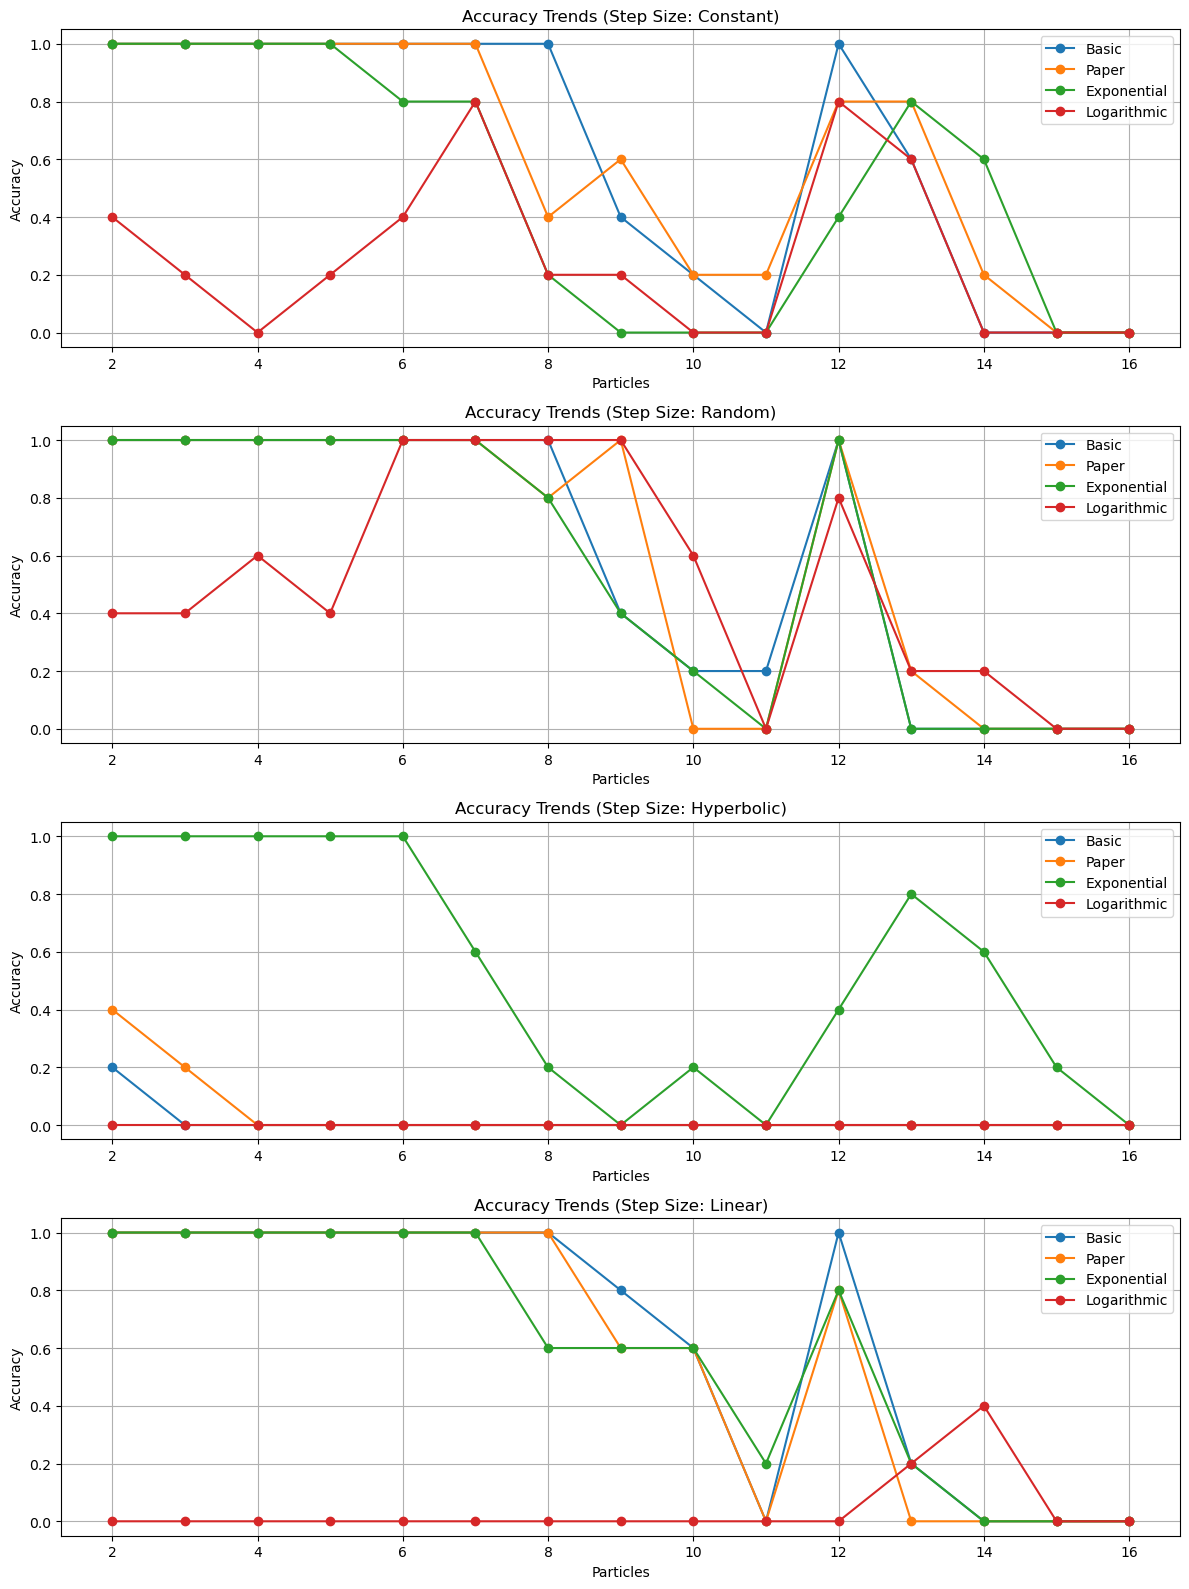

In [16]:
def display_best_strategies(results_df):
    """
    Display and plot the best strategies based on overall accuracy.

    Parameters:
    - results_df: DataFrame summarizing the accuracy of each strategy.
    """
    # Group by strategy (Cooling + Step Size) and calculate the mean accuracy across all particle counts
    grouped = results_df.groupby(["Cooling", "Step Size"])["Accuracy"].mean().reset_index()

    # Sort strategies by overall accuracy
    best_strategies = grouped.sort_values("Accuracy", ascending=False).reset_index(drop=True)

    print("Top Strategies (Overall Accuracy):")
    display(best_strategies)

def plot_accuracy_by_strategy(results_df):
    """
    Plot accuracy trends for each step size strategy across cooling schedules.

    Parameters:
    - results_df: DataFrame summarizing the accuracy of each strategy.
    """
    step_size_strategies = results_df["Step Size"].unique()
    cooling_schedules = results_df["Cooling"].unique()

    # Create subplots for each step size strategy
    fig, axes = plt.subplots(nrows=len(step_size_strategies), ncols=1, figsize=(12, len(step_size_strategies) * 4))
    if len(step_size_strategies) == 1:  # If only one strategy, axes is not iterable
        axes = [axes]

    for ax, step_size in zip(axes, step_size_strategies):
        for cooling in cooling_schedules:
            subset = results_df[(results_df["Step Size"] == step_size) & (results_df["Cooling"] == cooling)]
            ax.plot(
                subset["Particles"],
                subset["Accuracy"],
                label=cooling,
                marker="o"
            )
        ax.set_title(f"Accuracy Trends (Step Size: {step_size})")
        ax.set_xlabel("Particles")
        ax.set_ylabel("Accuracy")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

display_best_strategies(results_df)
plot_accuracy_by_strategy(results_df)
